# Transfer Learning through Pre-trained InceptionV3 model

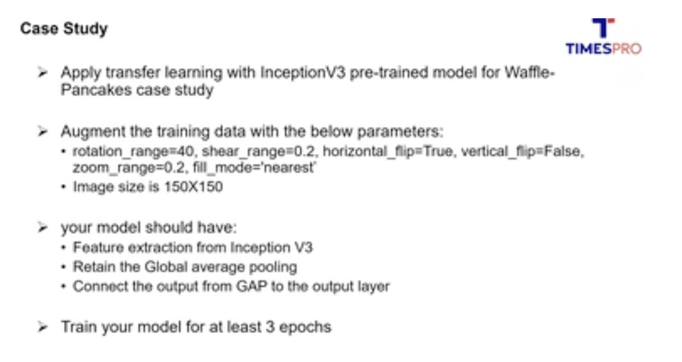

In [1]:
import numpy as np
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.preprocessing import image

*Note*

The preprocessing function preprocess_input for InceptionV3 and many other pre-trained models typically includes normalization steps that adjust the pixel values of the images in a way that's consistent with the data the model was originally trained on. If you don't apply this preprocessing to the test data, the pixel values will be on a different scale or distribution than what the model expects, potentially leading to poor performance.

In [2]:
# Instantiate ImageDataGenerator with all the augmentation.

train_gen=image.ImageDataGenerator(rotation_range=40,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  zoom_range=0.2,
                                  fill_mode='nearest',
                                  preprocessing_function=preprocess_input)

# test_gen=image.ImageDataGenerator(rescale=1./255)

test_gen = image.ImageDataGenerator(preprocessing_function=preprocess_input)


The preprocess_input function will handle any necessary scaling and other preprocessing steps required by the InceptionV3 model. Using different preprocessing methods for training and testing can lead to inconsistent results, so it's crucial to ensure the same preprocessing is applied in both cases.

In [3]:
v_batch_size = 35

In [4]:
train_data=train_gen.flow_from_directory('data/waffle_pancakes_ds/train',
                                             batch_size=v_batch_size,
                                             target_size=(150,150),
                                             class_mode='binary')

Found 735 images belonging to 2 classes.


In [5]:
test_data=test_gen.flow_from_directory('data/waffle_pancakes_ds/test',
                                             target_size=(150,150),
                                             batch_size = v_batch_size,
                                             class_mode='binary')

Found 389 images belonging to 2 classes.


In [6]:
## Create architecture
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense

In [7]:
base_model=InceptionV3(weights='imagenet',
                       include_top=False,
                       input_shape=(150,150,3),
                       pooling='avg')

2023-10-01 12:20:30.058706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


*When u say include_top=False u chop of GAP and O/P layer of 1000 classes. If u want to retain GAP, then u need to include pooling='avg' as well with include_top=False*


include_top=False, here by top we mean starting from O/P layer so o/p & dense layers fully connected or GAP are excluded while conv layers remain.

base_model.trainable=False because dont want to train feature extraction/conv layers as features r already extracted on some 10 lakh of images.

In [8]:
base_model.trainable=False

In [9]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [10]:
# let's add a fully-connected layer
# dense_layer = Dense(1024, activation='relu')

# We dont require dense layer here as GAP is equivalent/replacement of that

# and a prediction layer or output layer 
prediction_layer = Dense(1, activation='sigmoid')

# Combining everything
model = Sequential([
        base_model,
 #      dense_layer,
        prediction_layer
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
batch_size=35

In [14]:
model.fit(
    train_data,
    steps_per_epoch=train_data.samples//v_batch_size,
    epochs=3,
    validation_data=test_data)

Epoch 1/3
21/21 [==============================] - 20s 850ms/step - loss: 0.5099 - accuracy: 0.7864 - val_loss: 0.3868 - val_accuracy: 0.8380
Epoch 2/3
21/21 [==============================] - 17s 802ms/step - loss: 0.2975 - accuracy: 0.8803 - val_loss: 0.2690 - val_accuracy: 0.8946
Epoch 3/3
21/21 [==============================] - 17s 810ms/step - loss: 0.2701 - accuracy: 0.8884 - val_loss: 0.2412 - val_accuracy: 0.8972
